In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
from sklearn.metrics import mean_squared_error # MSE metric
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding categorical variables
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
#import shap as shap
#import pandas_profiling as pp # Auto EDA

# SEED = 91 # random seed

# pd.set_option('display.max_columns', 500)

In [ ]:
# Load data from dataset and display

df = pd.read_csv('https://raw.githubusercontent.com/alex-s-888/Insurance-Promotion/refs/heads/main/dataset/InsurancePolicyHistoricalData.csv')
df

,Unnamed: 0,Age,AnnualIncome,ChronicDiseases,EmploymentType,EverTravelledAbroad,FamilyMembers,FrequentFlyer,GraduateOrNot,InsurancePolicy
0,0,31,400000,Yes,Government,No,6,No,Yes,0
1,1,31,1250000,No,Private,No,7,No,Yes,0
2,2,34,500000,Yes,Private,No,4,No,Yes,1
3,3,28,700000,Yes,Private,No,3,No,Yes,0
4,4,28,700000,Yes,Private,No,8,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,1500000,No,Private,Yes,4,Yes,Yes,1
1983,1983,28,1750000,Yes,Private,Yes,5,No,Yes,0
1984,1984,28,1150000,Yes,Private,No,6,No,Yes,0
1985,1985,34,1000000,No,Private,Yes,6,Yes,Yes,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'AnnualIncome', 'ChronicDiseases',
       'EmploymentType', 'EverTravelledAbroad', 'FamilyMembers',
       'FrequentFlyer', 'GraduateOrNot', 'InsurancePolicy'],
      dtype='object')

In [ ]:
# Column 'Unnamed: 0' is irrelevant, drop it
df = df.drop(columns=['Unnamed: 0'], axis=1)

,Age,AnnualIncome,ChronicDiseases,EmploymentType,EverTravelledAbroad,FamilyMembers,FrequentFlyer,GraduateOrNot,InsurancePolicy
0,31,400000,Yes,Government,No,6,No,Yes,0
1,31,1250000,No,Private,No,7,No,Yes,0
2,34,500000,Yes,Private,No,4,No,Yes,1
3,28,700000,Yes,Private,No,3,No,Yes,0
4,28,700000,Yes,Private,No,8,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...
1982,33,1500000,No,Private,Yes,4,Yes,Yes,1
1983,28,1750000,Yes,Private,Yes,5,No,Yes,0
1984,28,1150000,Yes,Private,No,6,No,Yes,0
1985,34,1000000,No,Private,Yes,6,Yes,Yes,1


In [ ]:
# We have categorical and numeric features
NUM_FEATURES = ['Age', 'AnnualIncome', 'FamilyMembers',]
CAT_FEATURES = ['ChronicDiseases', 'EmploymentType', 'EverTravelledAbroad', 'FrequentFlyer', 'GraduateOrNot']
ALL_FEATURES = NUM_FEATURES + CAT_FEATURES

['Age',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'EmploymentType',
 'EverTravelledAbroad',
 'FrequentFlyer',
 'GraduateOrNot']

## Visualization

---


Let's check how individual features related to target 'InsurancePolicy' using countplot for categorical features and kdeplot for numeric


In [24]:
sns.set_palette("coolwarm")

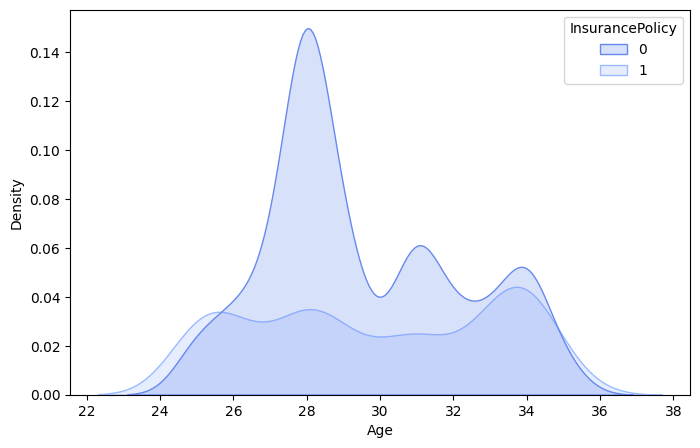

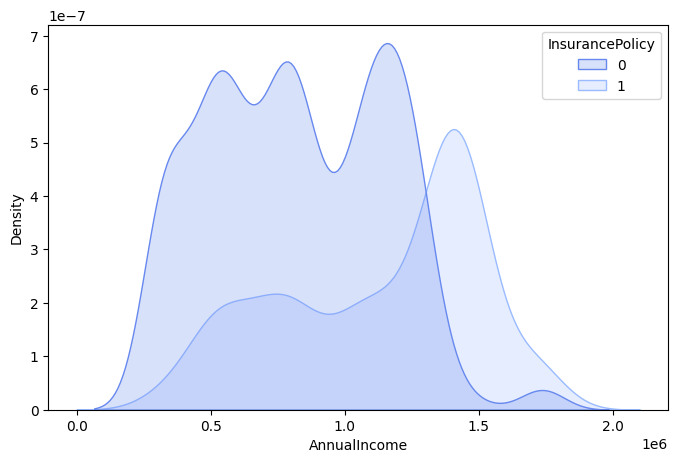

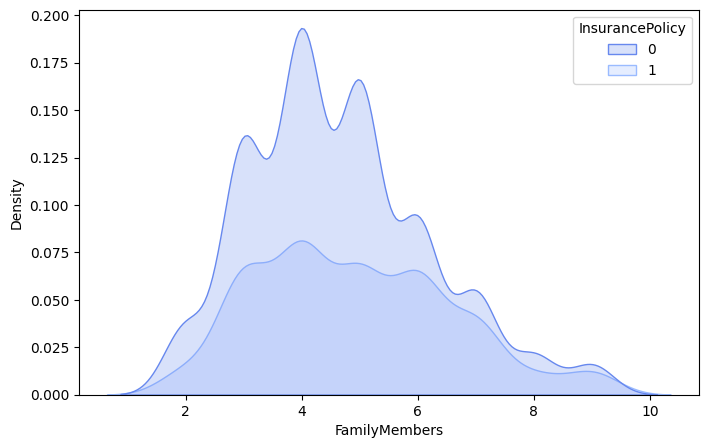

In [23]:
for feature in NUM_FEATURES:
  fig, ax = plt.subplots(figsize=(8,5))
  sns.kdeplot(data=df, hue='InsurancePolicy', fill=True, x=feature)
  plt.show()

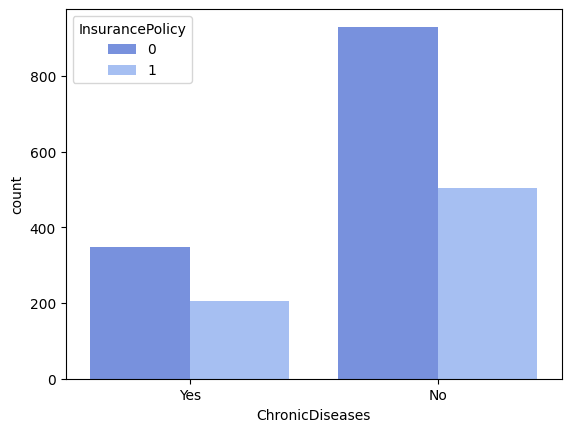

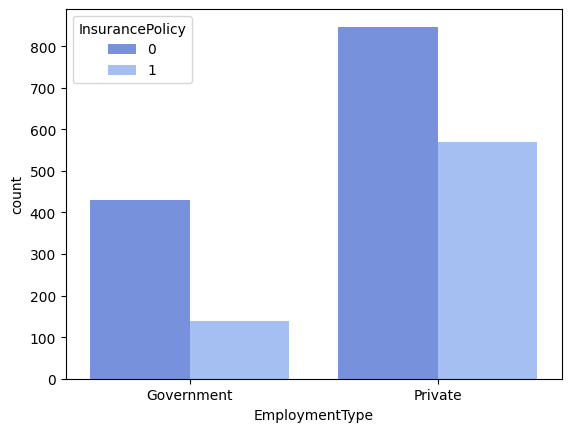

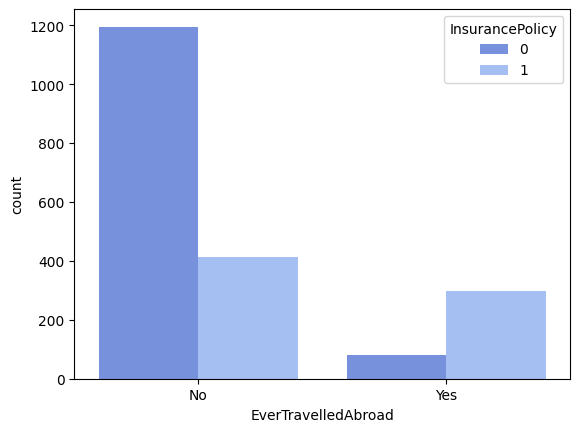

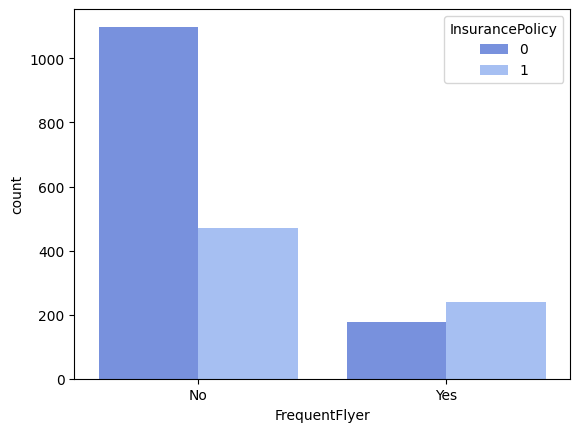

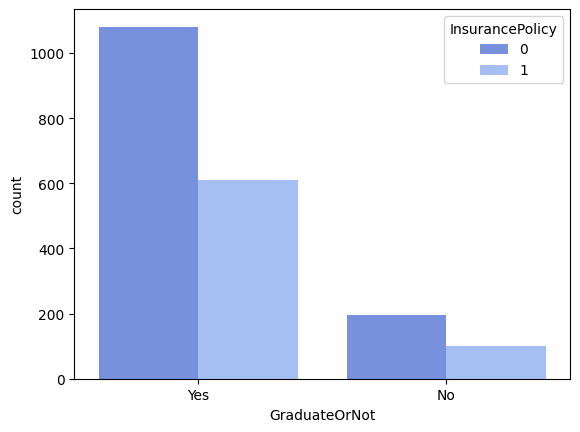

In [19]:
for feature in CAT_FEATURES:
    sns.countplot(data=df, x=feature, hue='InsurancePolicy')
    plt.show()

In [ ]:
# Feature importance: all numeric and EverTravelledAbroad, FrequentFlyer

In [ ]:
# The best separation in data is annualIncome, the clearer the data separation, the more it will affect the target

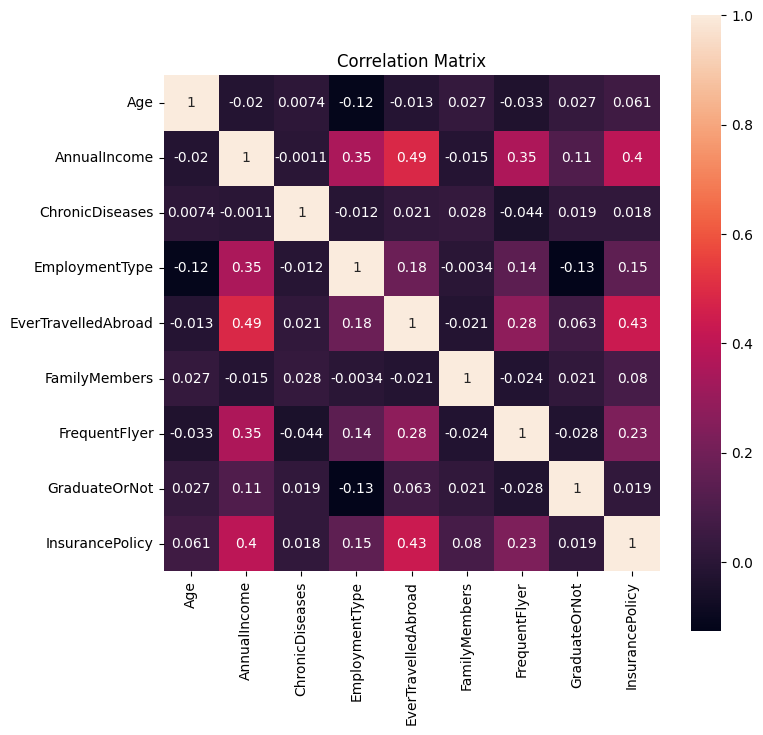

In [25]:
from sklearn.preprocessing import LabelEncoder

for col in CAT_FEATURES:
   encoder = LabelEncoder()
   df[col] = encoder.fit_transform(df[col])

# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap='Blues')
# plt.title('Correlation Matrix')
# plt.show()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()